In [11]:
# libraries importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [12]:
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [13]:
# uniques(df) ermittelt die einheitlichen Werte aller kategorischen (nicht numerischen) Spalten
def uniques(df, topn=50):
    import numpy as np 
    dfx = df.select_dtypes([object])
    return pd.DataFrame({'column': dfx.columns,
                         'values': [dfx[col].unique()[:topn] for col in dfx.columns]})

In [14]:
# Daten einlesen

In [15]:
housing = pd.read_csv('../data/melbourne_sample.csv')

Als erstes wollen wir verstehen, wie die Daten beschaffen sind


* Dazu verwenden wir verschieden Funktionen
* `DataFrame.info()` zeigt alle Spalten
* `DataFrame.sample(n)` zeigt eine Zufallsauswahl von n Zeilen
* Mit der Hilfsfunktion `uniques(df)` erhalten wir einen Eindruck der kategorischen Variablen
* `sns.histplot(data=dataframe, y='col')` zeigt ein Histogram für die Variable `col` an


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           2362 non-null   int64  
 1   Regionname     2362 non-null   object 
 2   Rooms          2362 non-null   int64  
 3   Distance       2362 non-null   float64
 4   Propertycount  2362 non-null   float64
 5   SellerG        2362 non-null   object 
 6   Price          1974 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 129.3+ KB


Die Daten verstehen

* Weil es sehr viele Daten sind zeigen wir eine Zufallsauswahl von 10 Rows an
* Dazu verwenden wir die Funktion DataFrame.sample()

In [17]:
housing.sample(10)

,Year,Regionname,Rooms,Distance,Propertycount,SellerG,Price
1582,2018,Northern Metropolitan,3,19.6,10926.0,Ray,515000.0
2141,2018,Northern Metropolitan,2,0.0,17496.0,MICM,780000.0
2018,2018,Western Metropolitan,3,14.8,6388.0,Barry,580000.0
1745,2018,Northern Metropolitan,1,5.3,11364.0,Woodards,375000.0
1309,2018,Western Metropolitan,3,4.3,4918.0,Biggin,1010000.0
783,2018,Northern Metropolitan,3,20.6,15510.0,LITTLE,430000.0
1499,2018,Northern Metropolitan,3,5.2,11918.0,Jellis,1100000.0
463,2018,Northern Metropolitan,3,3.4,5263.0,Rendina,NaN
1094,2018,Northern Metropolitan,3,14.0,4294.0,Eview,698000.0
1550,2018,Northern Metropolitan,2,6.7,3445.0,Nelson,NaN


In [18]:
uniques(housing)

,column,values
0,Regionname,"[Northern Metropolitan, Western Metropolitan, Northern Victoria, Western Victoria]"
1,SellerG,"[Jellis, Nelson, Barry, Brad, Sweeney, Barlow, hockingstuart, RT, Biggin, Alexkarbon, Douglas, YPA, Peter, Lindellas, Stockdale, Ray, Woodards, MICM, Collins, Raine, Chambers, Harrington, HAR, Burnham, Bells, Calder, Morrison, Millership, Iconek, Hodges, McGrath, Thomas, Edward, RW, Darren, Buckingham, Jason, LJ, Prof., Triwest, Greg, S&L, Moonee, Jas, PRDNationwide, Miles, Pagan, Purplebricks, Gary, FN]"


<Axes: xlabel='Price', ylabel='Count'>

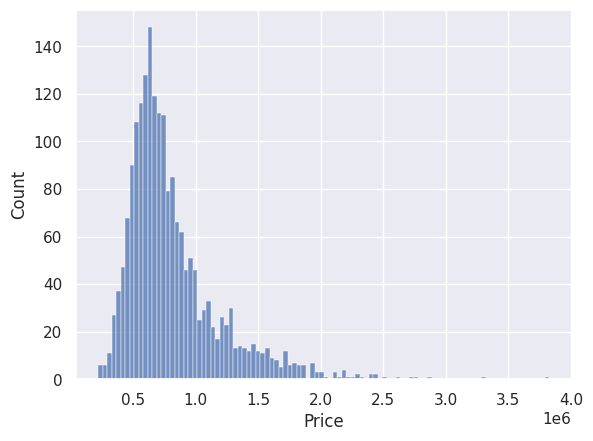

In [19]:
sns.histplot(data=housing, 
             x='Price', 
             bins=100,
             binwidth=None)

<Axes: xlabel='Propertycount', ylabel='Count'>

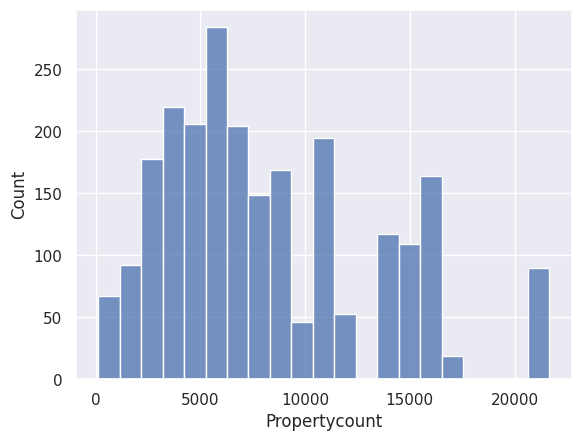

In [20]:
sns.histplot(data=housing, 
             x='Propertycount')

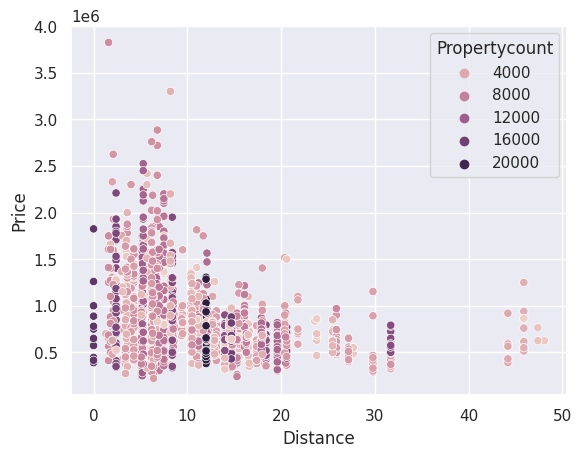

In [21]:
sns.scatterplot(data=housing, 
                x='Distance', 
                y='Price', 
                hue='Propertycount')
plt.show()

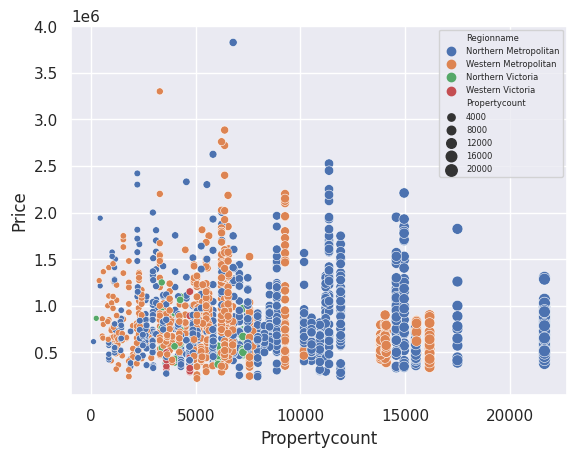

In [22]:
sns.scatterplot(data=housing, 
                x='Propertycount', 
                y='Price',
                size='Propertycount',
                hue='Regionname')
plt.legend(fontsize=6)
plt.show()

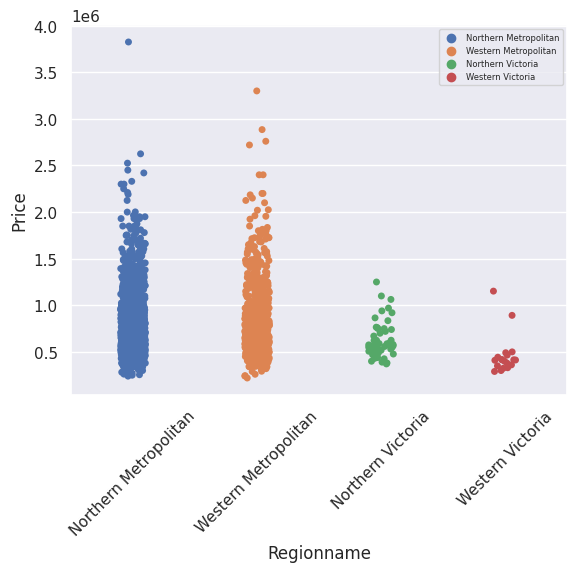

In [23]:
sns.stripplot(data=housing, 
                x='Regionname', 
                y='Price',
                hue='Regionname')
plt.legend(fontsize=6)
plt.xticks(rotation=45)
plt.show()

<Axes: >

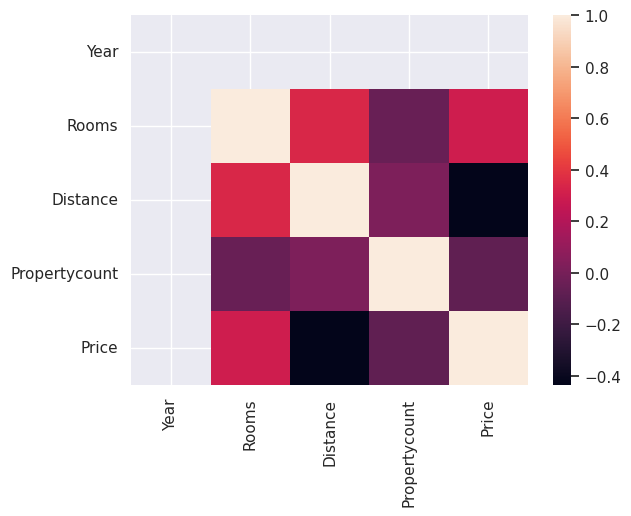

In [24]:
corr = (housing
        .select_dtypes(include='number')
        .corr()
       )
sns.heatmap(data=corr)

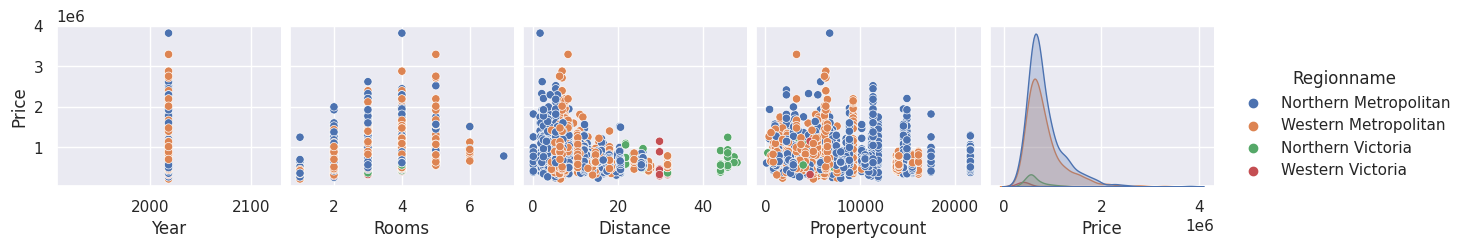

In [25]:
sns.pairplot(data=housing, 
             y_vars='Price',
             hue='Regionname')

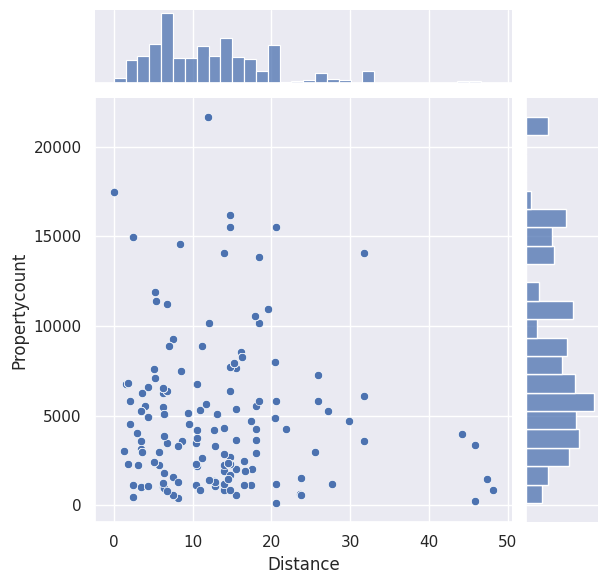

In [30]:
sns.jointplot(data=housing, x='Distance', y='Propertycount')

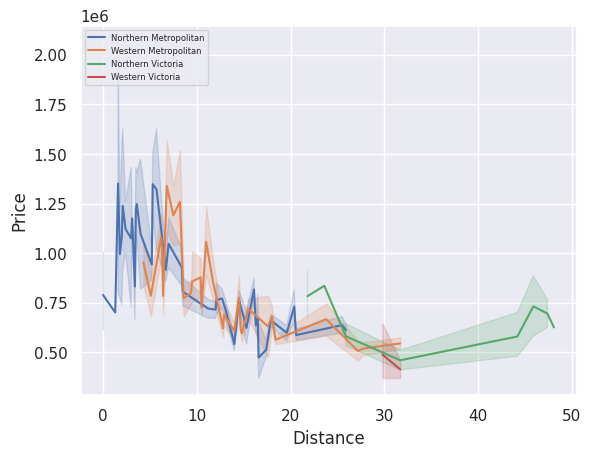

In [27]:
sns.lineplot(data=housing, 
             x='Distance', 
             y='Price', 
             hue='Regionname')
plt.legend(loc='upper left', 
           fontsize=6)

<Axes: xlabel='Distance', ylabel='Price'>

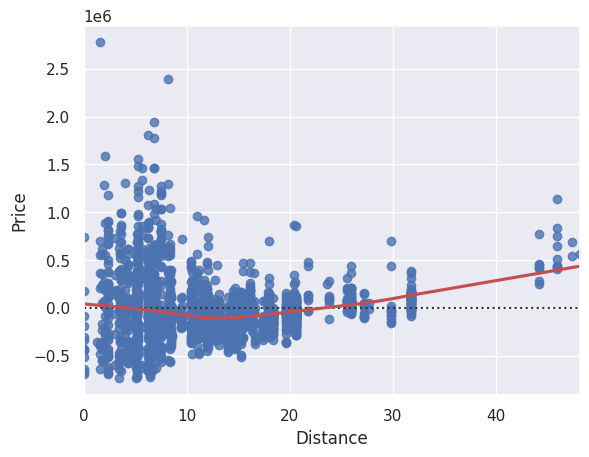

In [41]:
sns.residplot(data=housing, 
              x="Distance", 
              y="Price", 
              lowess=True, # show linear regression line, as evaluated at each point in x (smoothed, caution: estimated)
              line_kws=dict(color="r") # color of linear regression line
             )